<a href="https://colab.research.google.com/github/RITHWIK3224/AIML/blob/main/LAB_EXAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Random Forest

1. Implement Random Forest on a classification dataset and evaluate accuracy.
2. Compare Random Forest with a single decision tree classifier using accuracy.
3. Use feature importance to identify the top predictors in the dataset.
4. Visualize the out-of-bag (OOB) error to evaluate the model.
5. Evaluate the Random Forest model using confusion matrix and F1-score.

# Implement Random Forest on a Classification Dataset and Evaluate Accuracy

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

data_path = "/content/credit.csv"
data = pd.read_csv(data_path)


X = data.drop("default", axis=1)
y = data["default"]

non_numeric_columns = X.select_dtypes(include=['object']).columns

X = pd.get_dummies(X, drop_first=True)

X = X.replace('unknown', None)
X = X.fillna(X.median())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=42)
rf_model.fit(X_train, y_train)

rf_accuracy = accuracy_score(y_test, rf_model.predict(X_test))
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")


Random Forest Accuracy: 0.7600


# Compare Random Forest with a Single Decision Tree Classifier Using Accuracy

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

dt_accuracy = accuracy_score(y_test, dt_model.predict(X_test))
print(f"Decision Tree Accuracy: {dt_accuracy:.4f}")


Decision Tree Accuracy: 0.6633


# Use Feature Importance to Identify the Top Predictors


In [ ]:

feature_importances = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf_model.feature_importances_
}).sort_values(by="Importance", ascending=False)
print("\nFeature Importances:\n", feature_importances)



Feature Importances:
                             Feature  Importance
1                            amount    0.144240
4                               age    0.116152
0              months_loan_duration    0.108245
9          checking_balance_unknown    0.053783
2                 percent_of_income    0.051923
3                years_at_residence    0.046209
7           checking_balance_< 0 DM    0.038576
20         savings_balance_< 100 DM    0.025874
5              existing_loans_count    0.025500
34                        phone_yes    0.024991
29                      housing_own    0.023408
17     purpose_furniture/appliances    0.022264
10              credit_history_good    0.022256
27                other_credit_none    0.022197
24     employment_duration_< 1 year    0.022184
14                      purpose_car    0.021256
31                      job_skilled    0.020028
11           credit_history_perfect    0.018608
13         credit_history_very good    0.017643
25    employment_

# Visualize the Out-of-Bag (OOB) Error

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


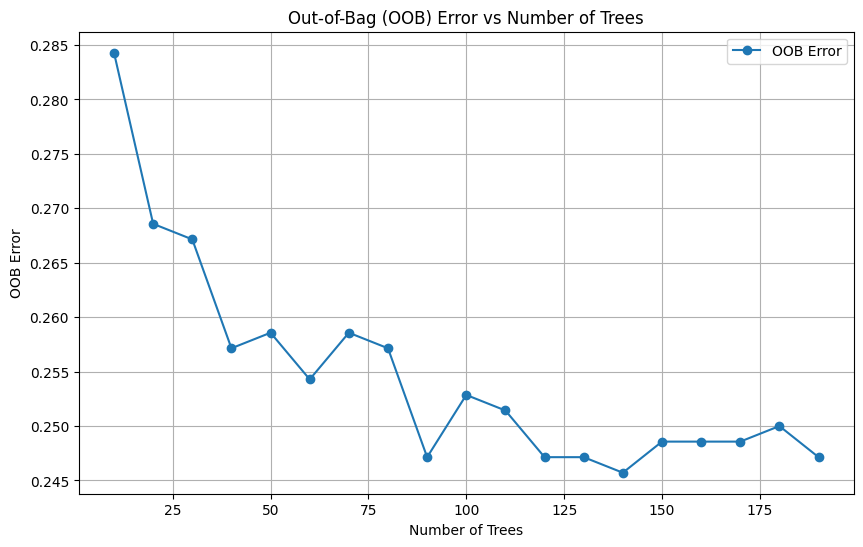

In [ ]:
import matplotlib.pyplot as plt

oob_errors = []
for n_trees in range(10, 200, 10):
    rf_temp = RandomForestClassifier(n_estimators=n_trees, oob_score=True, random_state=42)
    rf_temp.fit(X_train, y_train)
    oob_errors.append(1 - rf_temp.oob_score_)


plt.figure(figsize=(10, 6))
plt.plot(range(10, 200, 10), oob_errors, marker='o', label="OOB Error")
plt.xlabel("Number of Trees")
plt.ylabel("OOB Error")
plt.title("Out-of-Bag (OOB) Error vs Number of Trees")
plt.legend()
plt.grid(True)
plt.show()


# Evaluate the Random Forest Model Using Confusion Matrix and F1-Score

In [ ]:
from sklearn.metrics import confusion_matrix, f1_score

rf_predictions = rf_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, rf_predictions)


f1 = f1_score(y_test, rf_predictions, pos_label='yes')

print("\nConfusion Matrix:\n", conf_matrix)
print(f"F1-Score: {f1:.4f}"),



Confusion Matrix:
 [[196  13]
 [ 59  32]]
F1-Score: 0.4706


(None,)